# Importation des packages nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Base de données

Notre base de données provient de l'ADEME et concernent le parc de véhicules, au niveau régional, par motorisation, âge, statut de l'utilisateur, vignette crit'air et type de véhicule au 1er janvier de chaque année depuis 2011 et jusqu'en 2022. 

Nous avons 14260 observations pour 20 variables.

In [2]:
data=pd.read_csv("Donnees-sur-le-parc-de-vehicule-au-niveau-regional.2023-05.csv", sep=';',header=[1])
data.head()

,REGION_CODE,REGION_LIBELLE,CLASSE_VEHICULE,CATEGORIE_VEHICULE,CARBURANT,AGE,STATUT_UTILISATEUR,CRITAIR,PARC_2011,PARC_2012,PARC_2013,PARC_2014,PARC_2015,PARC_2016,PARC_2017,PARC_2018,PARC_2019,PARC_2020,PARC_2021,PARC_2022
0,84,Auvergne-Rhône-Alpes,tcp,Autobus,Diesel,0 an,Professionnel,Crit'Air 2,0,0,0,4,74,188,175,253,178,162,85,32
1,84,Auvergne-Rhône-Alpes,tcp,Autocar,Diesel,0 an,Professionnel,Crit'Air 2,0,0,0,9,436,644,644,693,556,709,383,331
2,84,Auvergne-Rhône-Alpes,tcp,Autobus,Diesel,0 an,Professionnel,Crit'Air 3,187,182,223,178,43,4,3,0,0,0,0,0
3,84,Auvergne-Rhône-Alpes,tcp,Autocar,Diesel,0 an,Professionnel,Crit'Air 3,487,552,500,713,194,20,2,2,0,0,0,0
4,84,Auvergne-Rhône-Alpes,tcp,Autobus,Diesel,0 an,Professionnel,Crit'Air 4,1,1,0,0,0,0,0,0,0,0,0,0


# Visualisation des différentes catégories de véhicules

In [3]:
variables = ['PARC_2011','PARC_2012','PARC_2013','PARC_2014','PARC_2015','PARC_2016','PARC_2017','PARC_2018','PARC_2019','PARC_2020','PARC_2021','PARC_2022']
data.groupby('CATEGORIE_VEHICULE')[variables].sum()

,PARC_2011,PARC_2012,PARC_2013,PARC_2014,PARC_2015,PARC_2016,PARC_2017,PARC_2018,PARC_2019,PARC_2020,PARC_2021,PARC_2022
CATEGORIE_VEHICULE,,,,,,,,,,,,
Autobus,19935,20379,20567,21261,21445,21995,21857,22208,23798,25039,26399,27927
Autocar,63538,64507,64562,65313,65539,65356,66658,67249,66972,67258,66519,66596
Autre VASP,111407,112299,115030,116821,119137,121772,125604,130150,132851,135047,141331,148602
Camion,317242,319386,314912,311576,308993,304994,305086,307067,306356,306208,304688,307385
Camionnette,4197919,4278148,4337506,4421633,4508317,4581776,4679694,4798184,4857367,4823739,4831151,4868001
Camping-car,299354,315358,328242,341066,354094,368545,383908,399781,415555,431637,449049,473771
Dérivé VP,831826,844830,850112,859212,869492,877070,891033,903609,900248,875600,835900,788506
Tracteur routier,198031,199745,195227,194017,192090,194354,198194,205362,213177,217796,216157,219795
VASP lourd,72433,75135,76914,78750,80353,81555,82656,83470,84440,85981,87013,89125


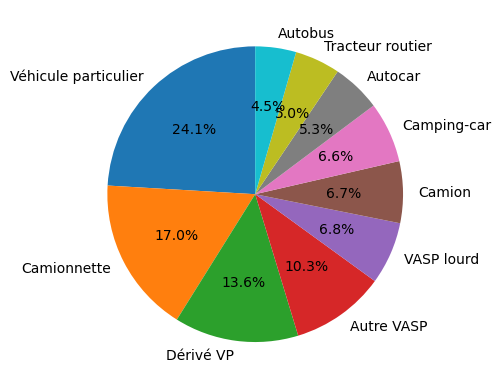

In [4]:
categories=data['CATEGORIE_VEHICULE'].value_counts()
plt.pie(categories, labels=categories.index, autopct='%1.1f%%', startangle=90)
plt.show()

Comme nous pouvons le voir, nous avons 10 catégories de véhicules différentes. Les véhicules particuliers sont très largement 
surreprésentés puisqu'un véhicule sur quatre quasiment est un véhicule particulier.
Dans cet étude nous ne nous interresseront donc seulement aux véhicules particuliers (camionettes et dérivés VP).

In [5]:
data = data.loc[data["CATEGORIE_VEHICULE"] == "Véhicule particulier"]
data.head()

,REGION_CODE,REGION_LIBELLE,CLASSE_VEHICULE,CATEGORIE_VEHICULE,CARBURANT,AGE,STATUT_UTILISATEUR,CRITAIR,PARC_2011,PARC_2012,PARC_2013,PARC_2014,PARC_2015,PARC_2016,PARC_2017,PARC_2018,PARC_2019,PARC_2020,PARC_2021,PARC_2022
33999,84,Auvergne-Rhône-Alpes,vp,Véhicule particulier,Diesel,0 an,Professionnel,Crit'Air 1,0,2,1,3,0,5,0,0,0,0,0,0
34000,84,Auvergne-Rhône-Alpes,vp,Véhicule particulier,Diesel,0 an,Professionnel,Crit'Air 2,22840,60245,58627,56823,55903,55948,59274,62531,56444,53142,37552,29362
34001,84,Auvergne-Rhône-Alpes,vp,Véhicule particulier,Diesel,0 an,Professionnel,Crit'Air 3,32626,2456,54,1,1,1,1,0,0,0,0,0
34002,84,Auvergne-Rhône-Alpes,vp,Véhicule particulier,Diesel,0 an,Professionnel,Crit'Air 4,7,1,0,0,1,0,0,0,0,0,0,0
34003,84,Auvergne-Rhône-Alpes,vp,Véhicule particulier,Diesel,0 an,Professionnel,Crit'Air 5,0,1,0,0,0,0,0,0,0,0,0,0


# Évolution du nombre de véhicules particuliers chaque année

Nous allons tout d'abord chercher à comprendre comment évolue le nombre de véhicules particuliers par an sur le parc automobile, avant de passer à des études plus spécifiques en fonction des crit'ir et du carburant.

In [6]:
def nb_vehicules(data):
    annees={'Années':[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]}
    annees=pd.DataFrame(annees)
    nb={'Nombre_Vehicules':[]}
    n=[]
    for k in range (11,23):
        n.append(data[f'PARC_20{k}'].sum())
    nb['Nombre_Vehicules']=n
    nb=pd.DataFrame(nb)
    df=pd.concat([annees,nb],axis=1)
    return df

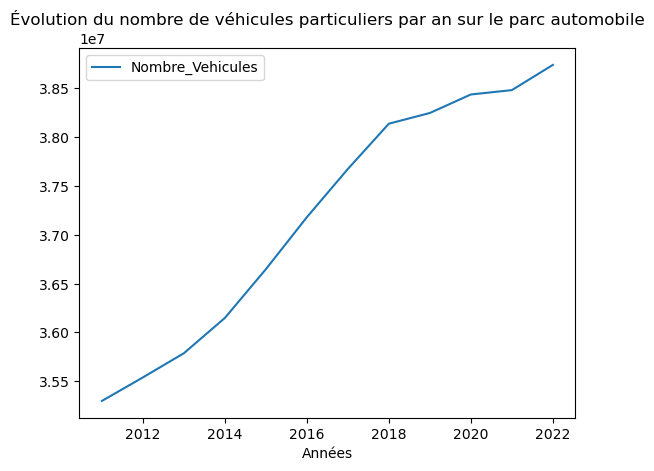

In [10]:
n=nb_vehicules(data)
n=n.set_index('Années')
n.plot()
plt.title("Évolution du nombre de véhicules particuliers par an sur le parc automobile")
plt.show()

Cette croissance semble à première vu linéaire, ce qui nous permet de faire une simple régression linéaire pour connaitre le nombre de véhicules chaque année sur le parc.

In [16]:
df=nb_vehicules(data)
df['Taux de croissance'] = ((df['Nombre_Vehicules'] - df['Nombre_Vehicules'].shift(1)) / df['Nombre_Vehicules'].shift(1)) * 100
print(f"Le taux de croissance moyen est de : {df['Taux de croissance'].mean()} par an.")

Le taux de croissance moyen est de : 0.8496283028083781 par an.


## Évolution du nombre de véhicules par crit'air

In [31]:
result_crit = data.groupby(['CRITAIR'])[['PARC_2011','PARC_2012','PARC_2013','PARC_2014','PARC_2015','PARC_2016','PARC_2017','PARC_2018','PARC_2019','PARC_2020','PARC_2021','PARC_2022']].sum().reset_index()
result_crit

,CRITAIR,PARC_2011,PARC_2012,PARC_2013,PARC_2014,PARC_2015,PARC_2016,PARC_2017,PARC_2018,PARC_2019,PARC_2020,PARC_2021,PARC_2022
0,Crit'Air 1,527854,1117200,1628418,2209327,2843000,3627493,4573613,5689663,7038271,8486922,9606394,10798122
1,Crit'Air 2,3789902,5316792,6759839,8048141,9248639,10321928,11295451,12142060,12842824,13548475,13972530,14155893
2,Crit'Air 3,13144926,12986403,12702081,12429698,12177620,11904009,11544080,11109790,10535664,9934637,9280651,8651975
3,Crit'Air 4,5846557,5728186,5612887,5476668,5331910,5141116,4897301,4591725,4166628,3669836,3231906,2862703
4,Crit'Air 5,2353321,2257293,2145067,2016426,1880410,1729316,1562731,1390437,1184214,959626,771784,653626
5,Crit'Air E,1279,3749,8791,16499,25329,41336,60910,82227,106440,141498,245281,403010
6,Inconnu,612,692,787,845,859,886,935,976,943,931,882,840
7,Non classé,9635108,8129938,6929977,5951626,5140116,4414017,3738455,3129940,2371448,1693993,1371077,1212227


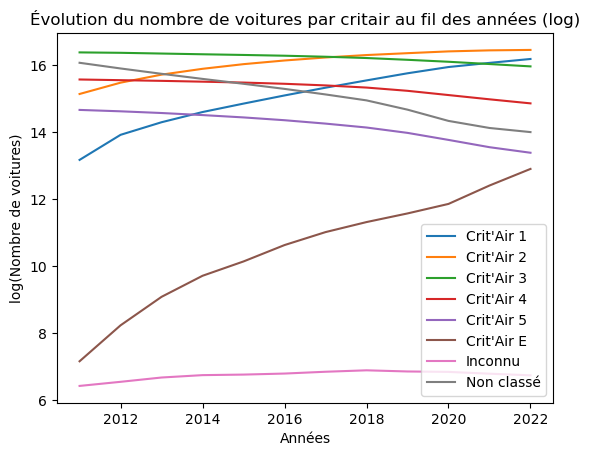

In [32]:
# Appliquez le logarithme à toutes les variables sélectionnées
result=result_crit.copy()
result[variables] = np.log(result[variables])

v=result.iloc[0]
v=v[1:]
Années=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
i=0
for c in result['CRITAIR']:
    v=result.iloc[i]
    v=v[1:]
    plt.plot(Années,v, label=c)
    i+=1

# Ajout des titres et légendes
plt.title('Évolution du nombre de voitures par critair au fil des années (log)')
plt.xlabel('Années')
plt.ylabel('log(Nombre de voitures)')
plt.legend()
plt.show()

Nous voyons très clairement que les véhicules électriques semblent avoir la croissance la plus importante, suivi par les crit'air 1.

## Estimation des taux de croissance

In [34]:
result_crit=result_crit.set_index('CRITAIR')

# Calculer les taux de croissance pour chaque colonne
taux_de_croissance = result_crit.pct_change(axis=1) * 100

# Calculer la moyenne des taux de croissance pour chaque ligne
taux_de_croissance_moyen = taux_de_croissance.mean(axis=1)

# Ajouter la colonne de taux de croissance moyen au DataFrame
result_crit['Taux_croissance_moyen'] = taux_de_croissance_moyen

In [35]:
taux_de_croissance

,PARC_2011,PARC_2012,PARC_2013,PARC_2014,PARC_2015,PARC_2016,PARC_2017,PARC_2018,PARC_2019,PARC_2020,PARC_2021,PARC_2022
CRITAIR,,,,,,,,,,,,
Crit'Air 1,NaN,111.649433,45.758861,35.673212,28.681721,27.593845,26.081925,24.401933,23.702775,20.582484,13.190554,12.405571
Crit'Air 2,NaN,40.288377,27.141310,19.058176,14.916463,11.604832,9.431600,7.495132,5.771377,5.494516,3.129909,1.312311
Crit'Air 3,NaN,-1.205963,-2.189382,-2.144397,-2.028030,-2.246835,-3.023595,-3.762015,-5.167748,-5.704690,-6.582888,-6.774051
Crit'Air 4,NaN,-2.024627,-2.012836,-2.426897,-2.643176,-3.578342,-4.742453,-6.239682,-9.257893,-11.923119,-11.933231,-11.423692
Crit'Air 5,NaN,-4.080531,-4.971707,-5.997062,-6.745400,-8.035163,-9.632999,-11.025186,-14.831524,-18.965153,-19.574501,-15.309724
Crit'Air E,NaN,193.119625,134.489197,87.680582,53.518395,63.196336,47.353397,34.997537,29.446532,32.936866,73.345913,64.305429
Inconnu,NaN,13.071895,13.728324,7.369759,1.656805,3.143190,5.530474,4.385027,-3.381148,-1.272534,-5.263158,-4.761905
Non classé,NaN,-15.621724,-14.759780,-14.117666,-13.635097,-14.126121,-15.304925,-16.277179,-24.233436,-28.567145,-19.062416,-11.585783


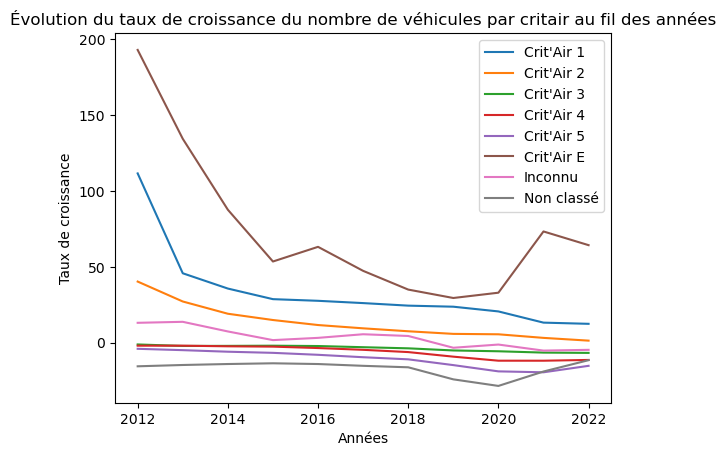

In [37]:
Années=[2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022] # on retire 2011
i=0
for c in taux_de_croissance.index:
    v=taux_de_croissance.iloc[i]
    v=v[1:]
    plt.plot(Années,v, label=c)
    i+=1
    
# Ajout des titres et légendes
plt.title('Évolution du taux de croissance du nombre de véhicules par critair au fil des années')
plt.xlabel('Années')
plt.ylabel('Taux de croissance')
plt.legend()
plt.show()

Le taux de croissance des crit'air les plus polluants est nul voir négatif pour certains comme les 5 et non classé.

## Évolution du nombre de véhicules par carburants

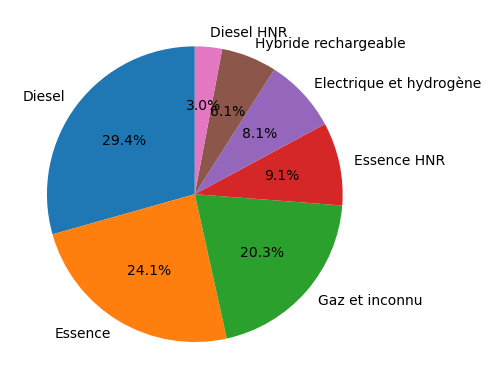

In [38]:
carburants=data['CARBURANT'].value_counts()
plt.pie(carburants, labels=carburants.index, autopct='%1.1f%%', startangle=90)
plt.show()

# Étude des entrées de nouveaux véhicules sur le marché

On va vouloir créer un tableau avec le nombre de véicules de 0 an pour chaque années en fonction du crit'air et du carburant.

In [40]:
data_neuf=data[data.AGE=="0 an"].copy()

### Carburants

In [41]:
data_neuf.groupby(['CARBURANT'])[['PARC_2011','PARC_2012','PARC_2013','PARC_2014','PARC_2015','PARC_2017','PARC_2018','PARC_2019','PARC_2020','PARC_2021','PARC_2022']].sum()

,PARC_2011,PARC_2012,PARC_2013,PARC_2014,PARC_2015,PARC_2017,PARC_2018,PARC_2019,PARC_2020,PARC_2021,PARC_2022
CARBURANT,,,,,,,,,,,
Diesel,1599354,1592652,1388397,1216709,1169419,1059582,993582,846464,759842,527533,366426
Diesel HNR,2,575,8854,13113,9121,4328,984,2703,11244,22990,36476
Electrique et hydrogène,239,2680,5504,8216,10207,21947,25194,31326,43133,111844,163854
Essence,575767,582228,485391,541741,603620,901396,1027219,1225230,1324492,810815,709176
Essence HNR,1230,1384,14265,32757,32314,46431,68638,89835,96714,151031,268450
Gaz et inconnu,75337,12203,2298,3019,2415,588,1187,2328,2356,16839,46466
Hybride rechargeable,6463,8799,3547,821,1982,7548,11823,14469,18386,74288,140561


### Crit'air

In [42]:
data_neuf.groupby(['CRITAIR'])[['PARC_2011','PARC_2012','PARC_2013','PARC_2014','PARC_2015','PARC_2017','PARC_2018','PARC_2019','PARC_2020','PARC_2021','PARC_2022']].sum()

,PARC_2011,PARC_2012,PARC_2013,PARC_2014,PARC_2015,PARC_2017,PARC_2018,PARC_2019,PARC_2020,PARC_2021,PARC_2022
CRITAIR,,,,,,,,,,,
Crit'Air 1,349151,594481,505003,578175,640274,955861,1108785,1331838,1441943,1052970,1164649
Crit'Air 2,923393,1534540,1396119,1229646,1178450,1063924,994554,849169,771072,550521,402902
Crit'Air 3,984103,67794,1139,130,28,19,16,13,15,4,3
Crit'Air 4,84,45,17,11,8,7,3,0,3,0,1
Crit'Air 5,5,4,3,1,1,0,0,0,0,0,0
Crit'Air E,248,2579,5256,8174,10187,21947,25194,31327,43133,111844,163854
Inconnu,87,76,105,85,30,62,74,8,1,1,0
Non classé,1321,1002,614,154,100,0,1,0,0,0,0


/opt/mamba/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


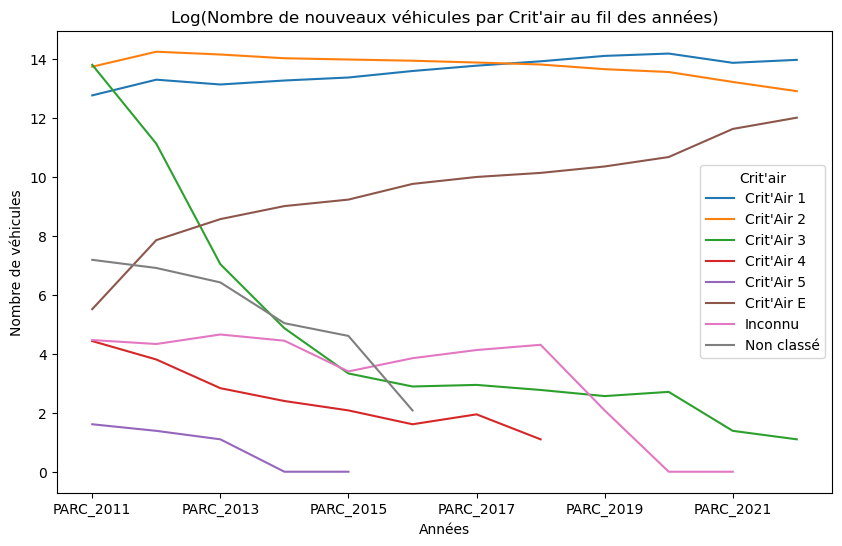

In [48]:
df1=data_neuf.groupby(['CRITAIR'])[variables].sum().reset_index()
df1.iloc[:,1:]=np.log(df1.iloc[:,1:])
df1

# Sélectionnez les colonnes avec les années
annees = df1.columns[1:]  # Supposant que les années commencent à la deuxième colonne

# Groupez les données par classe et trouvez la somme des véhicules pour chaque année
donnees_agroupees = df1.groupby('CRITAIR')[annees].sum()

# Transposez les données pour les avoir sous une forme plus adéquate pour le tracé
donnees_transposees = donnees_agroupees.T

# Tracer un graphique pour chaque classe de véhicules
donnees_transposees.plot(kind='line', figsize=(10, 6))
plt.title("Log(Nombre de nouveaux véhicules par Crit'air au fil des années)")
plt.xlabel('Années')
plt.ylabel('Nombre de véhicules')
plt.legend(title="Crit'air")
plt.show()

## Attribution des vignettes crit'air

In [49]:
def attribuer_vignette_critair(age,carburant):
    # Logique de votre attribution de vignette en fonction des caractéristiques du véhicule
    if carburant== "Electrique et hydrogène":
        return "Crit'Air E"
    elif carburant =="Hybride rechargeable" or carburant=="Gaz et inconnu":
        return "Crit'Air 1"
    elif carburant =="Essence" or carburant =="Essence HNR":
        if age > 26:
            return "Non classé"
        elif age <=26 and age >=18 :
            return "Crit'Air 3"
        elif age <=17 and age >=13 :
            return "Crit'Air 2"
        else :
            return "Crit'Air 1"
    
    elif carburant == "Diesel" or carburant =="Diesel HNR":
        if age > 26:
            return "Non classé"
        elif age <26 and age >=23 :
            return "Crit'Air 5"
        elif age <23 and age >=18 :
            return "Crit'Air 4"
        elif age <18 and age >=13 :
            return "Crit'Air 3"
        elif age <13:
            return "Crit'Air 2"